## Cálculo Numérico - Turma X - Atividade Prática 1
# Aluno(a) 1: Mariana Siano
# Aluno(a) 2: Quezia

# Exercício 1

(a) Escreva um programa para computar um valor aproximado para a derivada de uma função usando a fórmula de diferenças finitas dada por:

$$
f^{\prime}(x) \approx \frac{f(x+h)-f(x)}{h}
$$


Teste o seu programa usando a função $\sin (x)$ para $x=1$. Determine o erro da aproximação comparando com o valor exato da derivada dado pela função nativa da linguagem Python $\cos (x)$.

(b) Faça um gráfico da magnitude do erro em função de $h$, para $h=\frac{1}{2}, \frac{1}{4}, \frac{1}{8} \ldots$. Utilize uma escala logarítmica para $h$ e para a magnitude do erro (valor absoluto).

(c) Existe um valor mínimo para a magnitude do erro? Qual o valor de $h$ nesse caso?

(d) Repita o exercício usando a aproximação por diferença central

$$
f^{\prime}(x) \approx \frac{f(x+h)-f(x-h)}{2 h}
$$

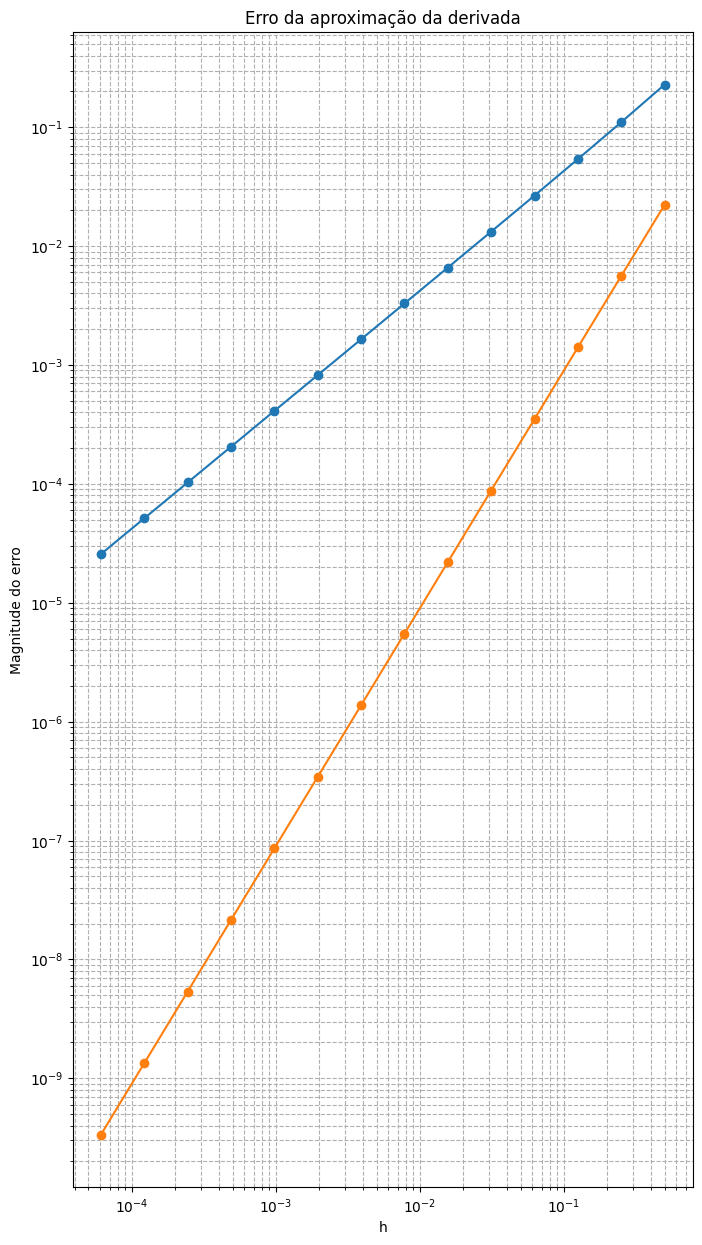

Erro mínimo (Progressiva): 2.568e-05 para h = 6.104e-05
Erro mínimo (Central): 3.358e-10 para h = 6.104e-05


In [19]:
import numpy as np
import matplotlib.pyplot as plt

# a) Definição da função e sua derivada analítica

def f(x):
    return np.sin(x)

def df_analitica(x):
    return np.cos(x)

# Defivada por difereça finita progressiva
def df_progressiva(f, x, h):
    return (f(x + h) - f(x)) / h

# d) Derivada por diferença central
def df_central(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

x0 = 1
h_values = 2.0 ** -np.arange(1, 15)  # h = 1/2, 1/4, ..., 1/16384

erro_progressiva = []
erro_central = []

# Calcula erros para cada h nas duas aproximações (Letras (a) e (d))
for h in h_values:
    derivada_prog = df_progressiva(f, x0, h)
    derivada_cent = df_central(f, x0, h)
    erro_p = abs(derivada_prog - df_analitica(x0))
    erro_c = abs(derivada_cent - df_analitica(x0))
    erro_progressiva.append(erro_p)
    erro_central.append(erro_c)

# b) Gráfico do erro vs h (escala log-log)
plt.figure(figsize=(8, 15))
plt.loglog(h_values, erro_progressiva, 'o-', label='Diferença Progressiva')
plt.loglog(h_values, erro_central, 'o-', label='Diferença Central')
plt.xlabel('h')
plt.ylabel('Magnitude do erro')
plt.title('Erro da aproximação da derivada')
plt.grid(True, which="both", ls="--")
plt.show()

# c) Encontrar o valor mínimo de erro e h corresponde para cada método
h_min_progr = h_values[np.argmin(erro_progressiva)]
h_min_cent = h_values[np.argmin(erro_central)]
erro_min_progr = min(erro_progressiva)
erro_min_cent = min(erro_central)

print(f'Erro mínimo (Progressiva): {erro_min_progr:.3e} para h = {h_min_progr:.3e}')
print(f'Erro mínimo (Central): {erro_min_cent:.3e} para h = {h_min_cent:.3e}')

# Exercício 2

Crie uma função que implemente o método de Newton para encotrar a raiz de uma equação passada por parâmetro.
Em seguida, use a função criada para encontrar a raiz da equação $ f(x) = e^x+2^{-x}+2 \cos x-6=0$, para $1 \leq x \leq 2$, com critério de parada $|f(x_k)| < $10^{-5}$.



In [20]:
import numpy as np

# Funções alvo
def f(x):
    return np.exp(x) + 2 ** -x + 2 * np.cos(x) - 6

# Derivada da função alvo
def df(x):
    return np.exp(x) - 2 ** -x * np.log(2) - 2 * np.sin(x)

# Método de Newton
def newton(f, df, x0, tol = 1e-5, max_iter = 100):
    x = x0
    for k in range(max_iter):
        fx = f(x)
        dfx = df(x)
        if abs(fx) < tol:
            return x
        x = x - fx / dfx
    raise RuntimeError("Não convergiu")

# Chamada: busca raiz em intervalo 1 <= x <= 2
raiz = newton(f, df, x0 = 1.5, tol = 1e-5)
print(f'Raiz encontrada: {raiz: .6f}')
print(f'|f(x)| na raiz: {abs(f(raiz)):.2e}')

Raiz encontrada:  1.829384
|f(x)| na raiz: 5.15e-08


---
# Exercício 3
## (a) Introdução ao Método de Euler Explícito para resolução de problemas de Valor Inicial (PVI)

O **Método de Euler Explícito** é um método numérico simples para resolver equações diferenciais ordinárias (EDOs) de primeira ordem. Dado um problema de valor inicial (PVI):

$$\frac{du}{dt} = f(t, u), \quad u(0) = u_0,$$

onde $u(t)$ é a função desconhecida, $f(t, u)$ é uma função dada e $u_0$ é o valor inicial da função, o método de Euler explítico consiste em aproximar a solução $u(t)$ através de uma discretização do tempo.

A ideia central do método é usar a fórmula de aproximação linear de primeira ordem:

$$u_{n+1} = u_n + \Delta t \cdot f(t_n, u_n),$$

onde:
- $u_n$ é a aproximação da solução no tempo $t_n$,
- $\Delta t$ é o passo de tempo,
- $f(t_n, u_n)$ é o valor da função $f$ no ponto $(t_n, u_n)$.

O método de Euler é chamado de explícito porque a expressão para $u_{n+1}$ é dada diretamente em função de $u_n$ (ou seja, $u_{n+1}$ é "calculado explicitamente" a partir de $u_n$).


Um ponto de atenção importante na **implementação** do método Euler explícito consiste na escolha do **passo de tempo**, pois alguns valores podem deixar o método **sujeito a instabilidades**.


---
## (b) Método de Euler Implícito para resolução de problemas de Valor Inicial (PVI)

No método de Euler Implícito, a aproximação da solução em cada passo de tempo é obtida pela equação:

\begin{equation}
    u_{n+1} = u_n + \Delta t \cdot f(t_{n+1}, u_{n+1}),
\end{equation}

onde a avaliação da função $f$ ocorre no ponto futuro $(t_{n+1}, u_{n+1})$. Esse método é classificado como *implícito* porque a incógnita $u_{n+1}$ aparece em ambos os lados da equação, exigindo a resolução de uma equação não-linear em cada passo.

A equação pode ser reescrita na forma:

\begin{equation}
    g(u_{n+1}) = -u_{n+1} + u_n + \Delta t \cdot f(t_{n+1}, u_{n+1}) = 0.
\end{equation}

Para resolver $g(u_{n+1}) = 0$, utilizamos o **Método de Newton**, iterando:

\begin{equation}
    u_{n+1}^{(k+1)} = u_{n+1}^{(k)} - \frac{g(u_{n+1}^{(k)})}{g'(u_{n+1}^{(k)})},
\end{equation}

onde a derivada $g'(u_{n+1})$ é dada por:

\begin{equation}
    g'(u_{n+1}) = -1 + \Delta t \cdot \frac{\partial f}{\partial u}.
\end{equation}

Este procedimento é repetido até que a solução convirja para um valor aceitável, com base em um critério de tolerância. Quando o critério de parada do método de Newton for satisfeito, $u_{n+1}^{(k+1)}$ será aceito como o valor de $u_{n+1}$, permitindo avançar para o próximo passo de tempo.


### Agora é sua vez!

Neste caso, use os métodos de Euler explícito e implícito para resolver o PVI do crescimento logístico:

$$y' = ry(1-y),$$
condição inicial: $y(0) = 0.5$ e $r=2$.

\
Note que o PVI é não linear, portanto, será necessário usar o método de Newton a cada passo de tempo do método de Euler Implícito.

a) Compare os resultados numéricos dos métodos de Euler Explícito e Implícito com solução analítica, se houver.

b) Teste diferentes valores de $\Delta t$ para avaliar a instabilidade do método.

c) Relate as diferenças observadas entre os métodos explícito e implícito.

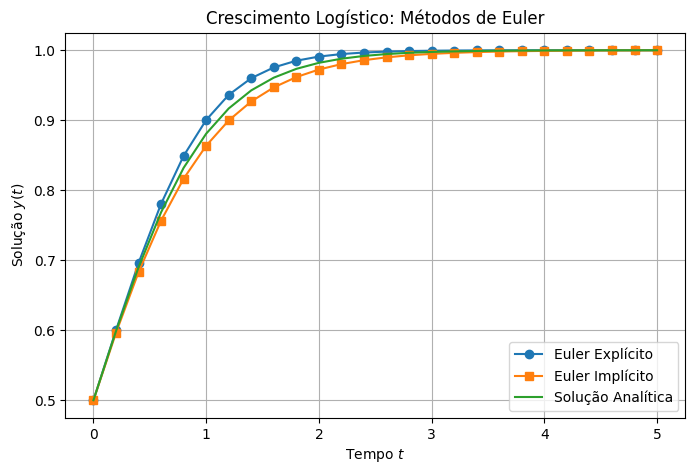

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Função do PVI: crescimento logístico
def f(t, y, r = 2):
    return r * y * (1 - y)

# Derivada parcial em relação a y (necessário para o método de Newton no Euler Implícito)
def df_dy(t, y, r = 2):
    return r * (1 - 2 * y)

# a) Implementação dos métodos e comparação com a solução analítica

def euler_explicito(f, y0, t0, tf, dt):
    N = int((tf-t0) / dt) + 1
    t = np.linspace(t0, tf, N)
    y = np.zeros(N)
    y[0] = y0
    for n in range(N - 1):
        y[n + 1] = y[n] + dt * f(t[n], y[n])
    return t, y

# Método de Newton para resolver o passo implícito
def newton_impl(func, dfunc, y_prev, t_next, dt, tol = 1e-8, max_iter = 20):
    y = y_prev # Chute inicial
    for _ in range(max_iter):
        g = -y + y_prev + dt * func(t_next, y)
        dg = -1 + dt * dfunc(t_next, y)
        delta = -g / dg
        y = y + delta
        if abs(delta) < tol:
            return y
    raise RuntimeError("Newton não convergiu")

def euler_implicito(f, df, y0, t0, tf, dt):
    t = np.arange(t0, tf + dt, dt)
    N = len(t)
    y = np.zeros(N)
    y[0] = y0
    for n in range(N-1):
        y[n+1] = newton_impl(f, df, y[n], t[n+1], dt)
    return t, y

# Solução analítica do crescimento logistíco
def y_analitica(t, r = 2, y0 = 0.5):
    return (y0 * np.exp(r * t)) / (1 + y0 * (np.exp(r * t) - 1))

# Parâmetros
y0 = 0.5
t0 = 0
tf = 5
dt = 0.2 # Pode variar para o item (b)

t, y_exp = euler_explicito(f, y0, t0, tf, dt)
_, y_imp = euler_implicito(f, df_dy, y0, t0, tf, dt)
y_ex = y_analitica(t)

plt.figure(figsize=(8, 5))
plt.plot(t, y_exp, 'o-', label='Euler Explícito')
plt.plot(t, y_imp, 's-', label='Euler Implícito')
plt.plot(t, y_ex, '-', label='Solução Analítica')
plt.xlabel('Tempo $t$')
plt.ylabel('Solução $y(t)$')
plt.legend()
plt.grid(True)
plt.title('Crescimento Logístico: Métodos de Euler')
plt.show()

# b) Teste para diferentes valores de dt